This is draft work on the Methods and Results of our Proposal

**METHODS**

***1. Tidying the Dataset***

To answer the above broad and specific question, KNN regression was determined to be the best approach to assess the relationship between played hours to the age of the player. First, load the appropriate library's as below, to be used for accurate visualization and to utilize the correct code for tidying the data set. For the purposes of this analysis, the "players.csv" dataset will be used.

In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Once there, the data is wrangled by first making gender into a vector to be factored, and then mutate the data such that both experience and gender can be considered as a factor. To do so, the data set is placed into a pipe function, followed by the mutate argument. Within mutate, experience is made into a factor, by modifying the data such that experience is equal to the as.factor operator, with experience contained inside. The same mutation is applied to gender. By making both of these columns factors, R is able to consider each observation as a word, or classification.

In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/GracieR90/dsci-100-2025w2-group-12/refs/heads/main/players.csv")

gender <- c("Male", "Female", "Non-binary", "Other", "Prefer not to say", "Two-Spirited")

players_mutate <- players_data |>
    mutate(
        experience = as.factor(experience),
        gender = as.factor(gender))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Then, age is converted into a numeric factor, in addition to mutating the data such that every column title is uniform. This allows for the data to become more tidy, and thereby more uniform to use in R when wrangling the data within code. Filter is applied to the mutated dataset onto the age category, removing all missing values from the age category. A pipe function is applied, followed by the mutate operator to turn Age into a numeric category by using as.numeric on the age column. Then, the filtered data is altered such that every column name is made to be in lower case and uniform. These modifications allow R to properly interpret each observation, and creates a more tidy data set that is easier to use.

In [3]:
players_filtered <- players_mutate |>
    filter(!is.na(Age)) |>
    mutate(Age = as.numeric(Age))

In [4]:
players_renamed <- players_filtered |>
    rename(
        experience = experience,
    subscription = subscribe,
    hashed_email = hashedEmail,
    name = name,
    gender = gender,
    age = Age)

Lastly,the suscription column is changed such that each observation, rather than TRUE or FALSE, will use corresponding "Yes" or "No" labels to make the identifications easier to interpret by using the "labels" operator equal to the vector "Yes" or "No". Another pipe operator is applied, followed by the select argument is used as well to remove columns which are not necessary, including "name" and "hashed email" in the format of select(- hashed_email, -name).

In [5]:
players_logical <- players_renamed |>
    mutate(subscription = factor(subscription, levels = c(TRUE, FALSE), labels = c("Yes", "No"))) |>
    select(- hashed_email, - name)
players_logical
#Print out head or tail of all tables, so they have just a glimpse!

experience,subscription,played_hours,gender,age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,Yes,30.3,Male,9
Veteran,Yes,3.8,Male,17
Veteran,No,0.0,Male,17
Amateur,Yes,0.7,Female,21
Regular,Yes,0.1,Male,21
Amateur,Yes,0.0,Female,17
Regular,Yes,0.0,Female,19
Amateur,No,0.0,Male,21
Amateur,Yes,0.1,Male,17


***2. Exploring KNN Regression***

Before we can model our KNN regression, we need to first visualize the data as a scatter plot where we place the two variables of interest. The predictor variable, the age of the player, will be placed with the response variable, the hours played, on the y axis. The ggplot argument will be applied to a label EDA for future reference. ggplot will contain the players_logical function tand then the aes function, with the x axis as our age, and y variable as our price contained within aes. Then, we add the function of geom_point to state that our plot must be a scatter plot. From there, xlab and y lab functions are used to label the x and y axis respectively. Within these, the titles are placed in quotations. We apply the ylim function to visualize independent data points clearer.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


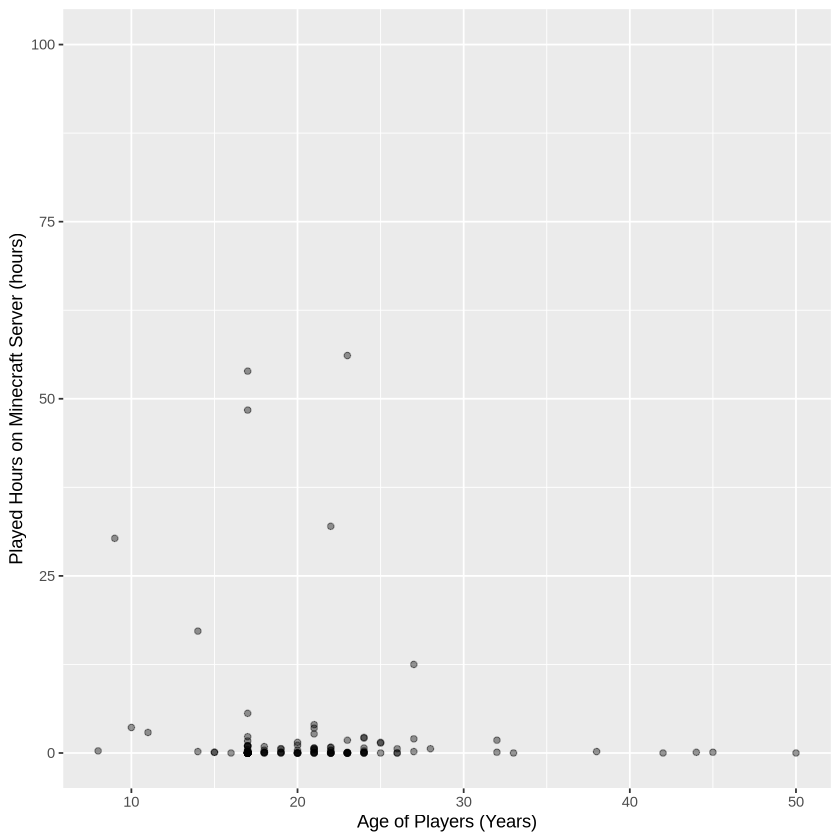

In [55]:
eda <- ggplot(players_train, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  xlab("Age of Players (Years)") +
  ylab("Played Hours on Minecraft Server (hours)") +
    ylim(0,100)
eda

#Its fine to leave it like this, just mention we cannot use a linear regression because no linear relationship. Accuracy isnt great as long as explanation is right


From this plot, the distribution of age is not very clear compared to the number of played hours. The data appears to have no linear trend, with many poitns clustered around a low playtime, but some extreme outliers. Age distribution is skewed towards younger players. However, these local patterns are more predictable based on the age's nearest neighbor. As played hours tends to cluster around 10 to 20 years old, which is where we also see the greatest outliers and values, this suggests that we may be able to assess this prediction with KNN Regression.

***3. Setting up KNN regression***

Next, to analyze the following dataset, KNN regression will be used. This is because as both variables of interest are numerical and non-linear. Both variables are numerical, but the broad age ranges and extreme playtime values are more likely to make their relationship non-linear. To compare and select a model, both a knn regression and linear regression model using training and test data from players.csv will be compared based on their best k value, and by extension, the accuracy of each model based on the ideal k value.

To first analyze the data using KNN regression, the tidymodels workflows will be used with a K-nearst neighbors approach to make predictions, with a cross validation to choose K effectively. First we will split the data using the initial_split operator on the tidied data. Then, the split data will be applied both into a training data set using the training operator, and a test data set using the testing operator. The data will be split 75/25 into training and validation using `initial_split()` with `prop = 0.75`, and `strata = played_hours`, then `testing()` and `training()` to separate the datasets. By splitting the data in this manner, so that the training set is used to teach the model by storing the feature-target relationships, while the testing data set will be used to assess how well the trained model performs on new, unseen data. We will be using the set.seed function to ensure running the same code multiple times will produce the same random results each time. Using set.seed() ensures that each model is evaluated on the same train-test split, leading to a fair comparison.

In [17]:
set.seed(5)
# what is above is fine, we dont need to be too detailed. This is morethan good enough above, as long as you explain methods of cross validation, why we do it and K values why we do it. We dont need to explain what workflow does, just the method we are using, what we apply, and then fitting our data
players_split <- initial_split(players_logical, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)
#Do your splitting before exploratory analysis. EDA shoudl be on testing data.Test odel assumptions and linear relationships

Then, we make a sample by using the slice_sample operator, with a random sample size of 30. This small sample size will be used with the summarise operator to create a new column, the predicted column. This will be the mean of the ages of each players, to assess what the predicted age is that has the most played hours.

In [18]:
set.seed(5)

small_players <- slice_sample(players_logical, n = 30)

#Ask if we need to include the other predicting graph from chapter 7.4, or since we aren't expecting a value but predicting, we need to see here.

We need to set up our model to first predict to the neareset neighbors of a given played hours, to preidct based on age, the number of hours which may be played. However, to do so, we need to decide on the value of K, which is the number of data points required to identify any new observations based on the number of similar data points near by, without subsampling the data, or selecting too few points. To do so, we will use the Root Mean Square Prediction Error, or the RMSPE, to compute the squared difference between the predicted and true response value for each observation in our test (or validation) set, compute the average, and then finally take the square root, to prevent us from overshooting or undershooting the true response value. 


First, we define a **recipe** to preprocess our data. Even though we only have one predictor—so standardization isn’t strictly necessary—we include it as a good habit for working with multiple predictors in the future.  

Next, we set up our **model specification** using `nearest_neighbor()` and specify `set_mode("regression")`. This tells tidymodels that we’re working with a regression problem, so it will use metrics like RMSPE instead of accuracy for evaluation.  

Now, we create a **5-fold cross-validation** object to help us assess model performance across different training and testing splits.  

Finally, we combine everything into a **workflow**, linking our recipe and model specification together. This workflow ensures that preprocessing and model fitting happen in a structured, repeatable way.

In [19]:
set.seed(5)

players_recipe <- recipe(played_hours ~ age, data = players_train) |> # This is according to the question
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec)

# How detailed do we need to be? Code by code, or can we also summarize as above?

Now, let’s run cross-validation to evaluate a range of K values, testing neighbors from 1 to 200. This will help us determine the optimal number of neighbors for our K-nearest neighbors regression model.

We use tune_grid() to tune the model, which returns the Root Mean Squared Prediction Error (RMSPE) for each 
K. The output is stored in the sacr_results data frame, where:

The neighbors column represents the 
K value (the number of neighbors considered in each prediction).

The mean column contains the estimated RMSPE from cross-validation.

The std_err column provides a measure of uncertainty in the RMSPE estimate.

In [27]:
set.seed(5)

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

gridvals <- tibble(neighbors = seq(from = 1, to = min(50, nrow(players_train) - 1), by = 2))

players_results <- players_workflow |>
 tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

players_results

#You need to explain what vfold does, cross validation, then make sure what function is doing. Say we're applying cross validation with a K value of 33 with 5 folds, and tuning with K values from 1- whatever
# Explain the main code and process, then go into it


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,23.80482,5,7.066098,Preprocessor1_Model01
3,rmse,standard,22.99244,5,5.874392,Preprocessor1_Model02
5,rmse,standard,21.07380,5,6.537745,Preprocessor1_Model03
7,rmse,standard,20.30607,5,6.839351,Preprocessor1_Model04
9,rmse,standard,19.93524,5,7.052718,Preprocessor1_Model05
11,rmse,standard,19.72373,5,7.131615,Preprocessor1_Model06
13,rmse,standard,19.54996,5,7.206653,Preprocessor1_Model07
15,rmse,standard,19.58868,5,7.184594,Preprocessor1_Model08
17,rmse,standard,19.43717,5,7.249784,Preprocessor1_Model09


We identify the optimal number of neighbors by selecting the \( K \) value that corresponds to the lowest RMSPE, by fitlering players_results by filtering the mean to be the lowest value using the min operator on the mean. Based on the results below, the smallest RMSPE occurs when K = 35.

In [21]:
set.seed(5)

players_min <- players_results |>
    filter(mean == min(mean))

players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
33,rmse,standard,18.91721,5,7.077196,Preprocessor1_Model17


Now that we've tuned our model, it's time to evaluate how well it performs on unseen data. To do this, we'll measure its RMSPE on the test set.  

First, we **retrain our K-NN regression model** using the entire training dataset, setting \( K = 33 \) as our chosen number of neighbors. Once the model is trained, we use the `predict()` function to generate predictions on the test data.  

Next, we use the `metrics()` function to compute a summary of our model’s regression performance. Since we previously specified `set_mode("regression")`, tidymodels automatically applies regression-related metrics—like RMSPE—rather than classification metrics, ensuring an appropriate evaluation of our model’s accuracy.

In [22]:
set.seed(5)

kmin <- players_min |> pull(neighbors)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_train)

players_summary <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,40.37339


Our final model's test error as assessed by RMSPE is 40.37 hours. In other words, we epect the error in our prediction to be roughly 40.37 hours. Based on this, we can assess our model appears to generalize well to new data it has never seen before. This value is also acceptable, as this does not represent a substantial fraction of the played hours a person of any age may play.

## It is not that great, because we need to compare to scale of played hours.Most of the data is between 0 -25. Since rmse is greater than that, its a huge error, and the model doesnt perform that great of a job. Talk about how we can reduce the error of the model, and highlight limitations of model. Interpretation of RMSE. Include more data points and  predictors to improve performance

To visually assess our model, we created a played_hours prediction grid. To do so, we set up our values such that the age is set to be sequenced from the minimum to maximum values by using the tibble operator to format the column of played hours to be sequenced using the seq operator. First, using the `seq()` function, it generates a range of ages starting from the minimum value in `players_test$age` and ending at the maximum, increasing by one year at a time. This sequence is then stored in a column named `age` within the tibble. Finally, the `print()` function displays the tibble, allowing us to review the generated age values that will be used in prediction tasks. 

In [23]:
set.seed(5)



playtime_prediction_grid <- tibble(
    age = seq(
        from = min(players_test$age), 
        to = max(players_test$age), 
        by = 1))
print(playtime_prediction_grid) 
# Get rid of this, do preediction on testing data


# A tibble: 38 × 1
     age
   <dbl>
 1    12
 2    13
 3    14
 4    15
 5    16
 6    17
 7    18
 8    19
 9    20
10    21
# ℹ 28 more rows


From there, we create a visualization using ggplot2 to compare actual and predicted ages based on the played hours. It begins by setting up a scatter plot with ggplot(), mapping played_hours to predictions column, .preds, and adding geom_point(alpha = 0.4) to plot the actual data points with slight transparency. Then, it overlays a prediction line using geom_line(), where players_preds provides the predicted values (.pred), drawn in steel blue with a line width of 1. The axes are labeled appropriately, and the plot is titled dynamically using paste0("K = ", kmin), indicating the selected number of neighbors in the K-NN model. Finally, the text size is adjusted with theme(text = element_text(size = 12)), and the plot is displayed by calling plot_final.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


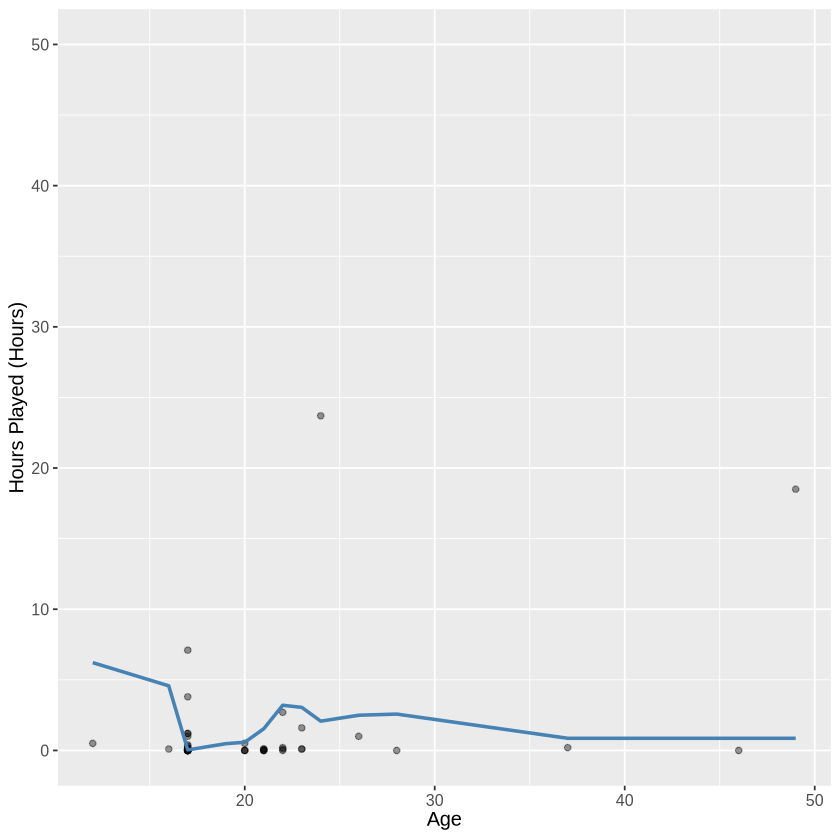

In [25]:
# Ensure the prediction grid includes 'age'
set.seed(5)

played_hours_prediction_grid <- tibble(
  age = seq(min(players_test$age), max(players_test$age), by = 1)
)
#Get rid of above

# Generate predictions
players_pred <- players_fit |>
  predict(players_test) |>
  bind_cols(players_test)

# Plot actual data points and prediction line
plot_final <- ggplot(players_test, aes(x = age, y = played_hours)) + 
  geom_point(alpha = 0.4) +
  geom_line(data = players_pred,
            mapping = aes(x = age, y = .pred),  # Ensure using correct column
            color = "steelblue",
            linewidth = 1) +
  xlab("Age") +
  ylab("Hours Played (Hours)") +
  theme(text = element_text(size = 12)) +
    ylim(0,50)

plot_final
#Push over our results!


### ***Results***

### **Discussion of KNN Regression Results** 

    **Do this in paragraph form**
        **Over/underfitting, mostly that and accuracy of model, and going back to specific main question (specific, and connect to introduction)**
        **Answer all questions in rubric! Thats what they're looking for
        **use the right methods and its fine. Also our group, so make sure we impliment all the feedback from proposal'
        **generalize what we found and the trend
        **have one person do it first, and push whatever changes, then let the other person know to pull, and then do it sequentially.

#### **Summary of Findings**  
- The **blue line** represents the KNN regression predictions for hours played based on age, with a K = 33.  
- The **scatter plot (gray dots)** shows the actual data points.  
- The regression line is highly **jagged**, especially for ages between **10-25**, indicating a lot of fluctuation in the predictions.  
- Beyond **age 25**, the model predicts nearly constant values for hours played, suggesting that the relationship weakens or that the data is sparse in this range.  
- There are **outliers**, especially a few individuals with **30+ hours played**, which could be influencing the model.
- The error as +/-40.37 hours may also hold significance in the ability to accurately interpret the number of played hours by each minecraft player

#### **Was This Expected?**  
- **Yes and No.**  
  - The jagged pattern was expected due to the nature of **KNN regression**, which tends to overfit when `K` is small.  
  - However, the **flat prediction** beyond **age 25** suggests the model may not have enough training data for older individuals, leading to poor generalization.  
  - We expected a **clear trend** (e.g., older individuals playing fewer hours). However, this graph does not strongly confirm that expectation.

#### **Impact of These Findings**  
- **Poor Generalization**: The current model may not perform well on new data, especially for older age groups.  
- **Data Sparsity**: The results highlight a possible **lack of representation** in the dataset for certain age groups.  
- **Overfitting Risk**: The sharp variations suggest the model is capturing noise rather than meaningful trends.  

#### **Future Questions to Explore**  
1. **How does increasing `K` affect the smoothness of the regression line?**  
2. **Would feature scaling improve the prediction quality?**  
3. **Does adding more data for older individuals change the results?**  
4. **Are there other factors (e.g., gaming experience, preferred game genre) that better explain playtime than age?**  
5. **Would a different regression model (e.g., polynomial or linear regression) perform better?**  
